In [43]:
import sys, os
sys.path.append(os.path.abspath("../.."))
sys.path.append(os.path.abspath("../../projective2d"))
import cv2
import numpy as np
import matplotlib.pyplot as plt
import projective2d as p2
import projective2d.utils as u

In [44]:
rectangle = np.array([[22, 103], [154, 109], [150, 42], [51, 39.0]])
l_shape = np.array([[118, 133], [37, 67], [125, 30.0]])

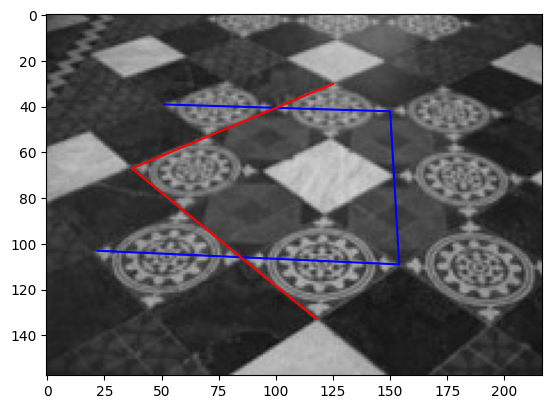

In [45]:
img = cv2.imread("transformed.jpg")
plt.plot(*rectangle.T, c="blue")
plt.plot(*l_shape.T, c="red")
plt.imshow(img)
plt.show()

First, try stratified rectification with orthogonal lines.

In [46]:
norm_rectangle = rectangle / img.shape[0]
norm_rectangle2 = rectangle2 / img.shape[0]
norm_l_shape = l_shape / img.shape[0]

In [47]:
H = p2.transforms.rectification_stratified_with_orthogonal_lines(u.canonical_embed_array(norm_rectangle))

In [48]:
M = np.eye(3)
M[:2, :2] /= img.shape[0]
H = H @ M

In [49]:
old_image_center = u.canonical_embed(np.mean(rectangle, axis=0))
image_center = np.array([img.shape[1] / 2.0, img.shape[0] / 2.0, 1.0])
H = p2.transforms.transform_remove_euclidean(H, old_image_center, image_center, img.shape[0] / 2.0)

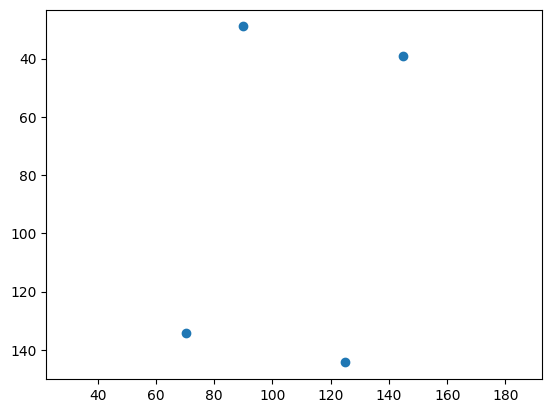

In [50]:
transformed = np.array([u.canonical_unembed(H @ u.canonical_embed(p)) for p in rectangle])
plt.scatter(*transformed.T)
plt.axis("equal")
plt.gca().invert_yaxis()
plt.show()

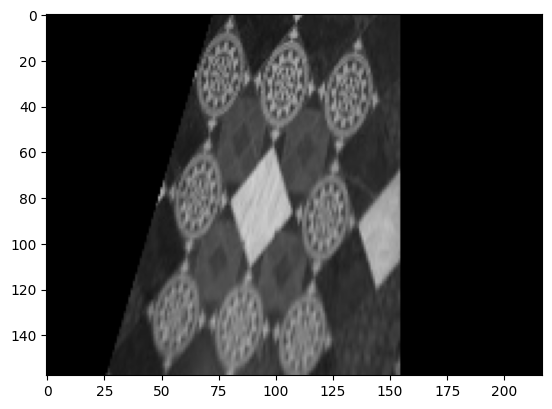

In [51]:
transformed = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))
plt.imshow(transformed)
plt.show()

Then, try rectification using the image of the dual circual points conic.

In [52]:
H = p2.transforms.rectification_with_orthogonal_lines(
    u.canonical_embed_array(norm_rectangle), 
    u.canonical_embed_array(norm_l_shape))

In [53]:
M = np.eye(3)
M[:2, :2] /= img.shape[0]
H = H @ M

In [54]:
old_image_center = u.canonical_embed(np.mean(rectangle, axis=0))
image_center = np.array([img.shape[1] / 2.0, img.shape[0] / 2.0, 1.0])
H = p2.transforms.transform_remove_euclidean(H, old_image_center, image_center, img.shape[0])

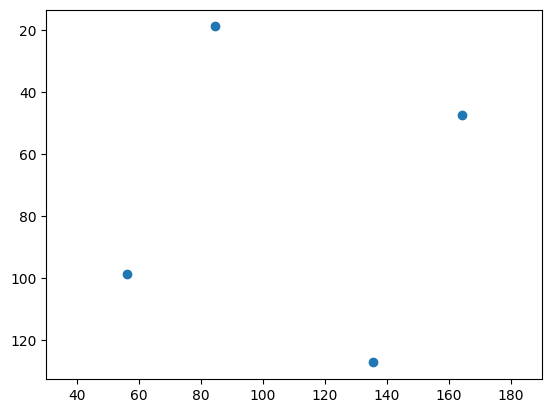

In [55]:
transformed = np.array([u.canonical_unembed(H @ u.canonical_embed(p)) for p in rectangle])
plt.scatter(*transformed.T)
plt.axis("equal")
plt.gca().invert_yaxis()
plt.show()

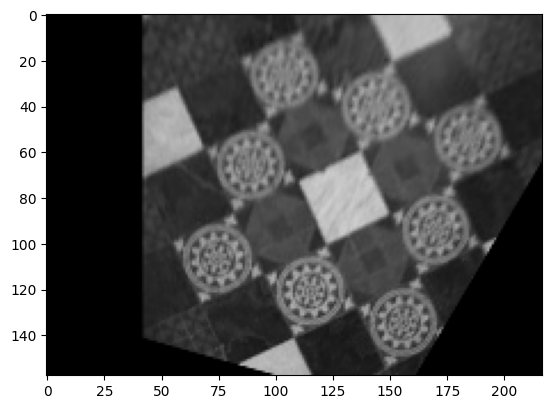

In [56]:
transformed = cv2.warpPerspective(img, H, (img.shape[1], img.shape[0]))
plt.imshow(transformed)
plt.show()